In [2]:
import numpy as np 
import pandas as pd 
# matplotlib.use('Agg') 
import pandas_datareader.data as web
from datetime import date
import matplotlib.pyplot as plt
# %matplotlib inline

In [3]:
def get_sp_data():
    sdate = date(2016,1,3)
    edate = date(2017,1,27)

    sp = web.DataReader('^GSPC','yahoo',sdate, edate)
    return sp

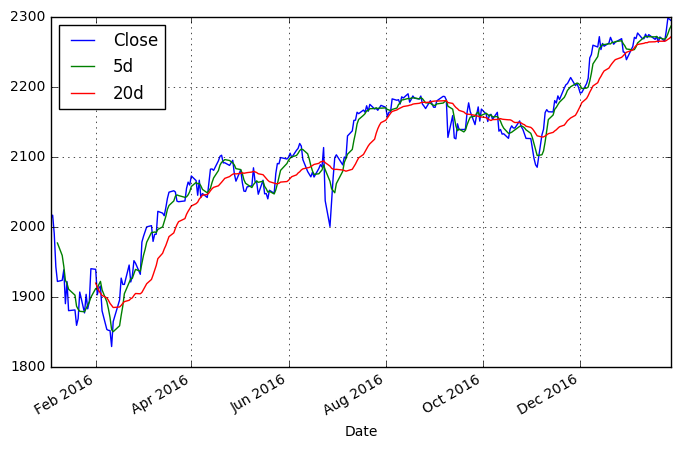

 0    160
 1     91
-1     19
Name: Regime, dtype: int64
Date
2017-01-23   -0.002694
2017-01-24    0.006543
2017-01-25    0.007994
2017-01-26   -0.000736
2017-01-27   -0.000867
Name: Market, dtype: float64


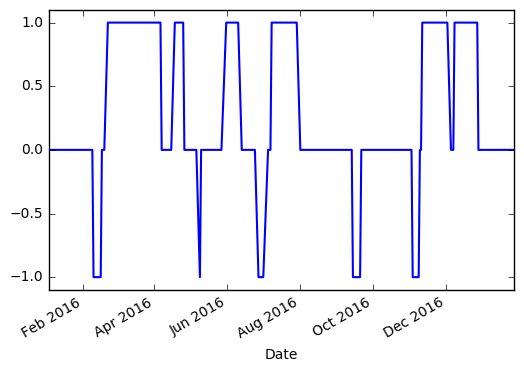

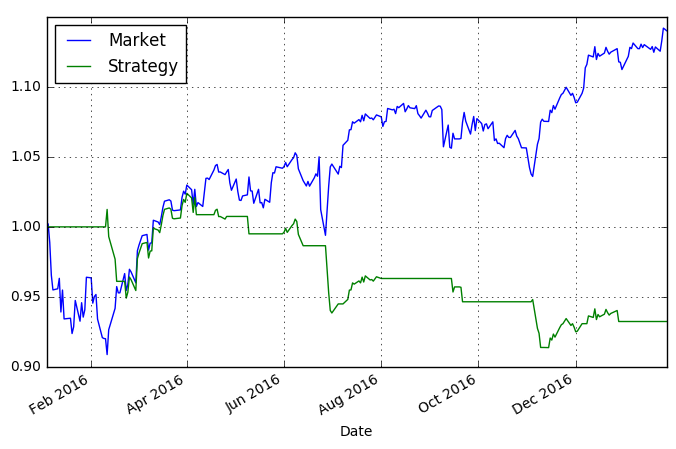

In [5]:
def historical_M_Avrg():
    sp = get_sp_data()
#     sp['Close'].plot(grid=True, figsize=(8,5))
    sp['5d'] = np.round(pd.Series(sp['Close']).rolling(window=5).mean(),2)
    sp['20d'] = np.round(pd.Series(sp['Close']).rolling(window=20).mean(),2)
    sp[['Close', '5d', '20d']].plot(grid=True, figsize=(8,5))
    plt.show()
    sp['5-20'] = sp['5d'] - sp['20d']
    sd = 20 #points 5d is above 20d
    sp['Regime'] = np.where(sp['5-20'] > sd, 1, 0) #dates when 5d is greater then 20d and sd, marked with 1, go long, 0 = parked in cash
    sp['Regime'] = np.where(sp['5-20'] < -sd, -1, sp['Regime']) #dates go short
    sp['Regime'].value_counts() #count number of 1, -1, 0 occurances 
    print(sp['Regime'].value_counts())
    sp['Regime'].plot(lw=1.5)
    plt.ylim([-1.1, 1.1]) #setting the limits of y-axis on matplotlib
    '''
    calculating returns market vs strategy
    '''
    sp['Market'] = np.log(sp['Close']/sp['Close'].shift(1))
    print(sp['Market'].tail())
    sp['Strategy'] = sp['Regime'].shift(1) * sp['Market']
    sp[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True, figsize=(8,5))
    
    plt.show()

historical_M_Avrg()